In [1]:
import string
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler


display(HTML("<style>.container { width:75% !important; }</style>"))
colors = ['#1F77B4', '#AEC7E8', '#FF7F0E', '#FFBB78', '#2CA02C', '#98DF8A', '#B5CF6B', '#FF9896','#9467BD', '#C5B0D5', '#BCBD22']

C:\Users\dilsh\AppData\Local\Temp\ipykernel_27692\3138823767.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Data Preparation and Preprocessing

## 1. Describe the Dataset

In [2]:
df = pd.read_csv("data.csv")
df.head(10)

C:\Users\dilsh\AppData\Local\Temp\ipykernel_27692\3622707691.py:1: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv")


Id                                              Title  \
0  37404348                           Casual Stock Replenisher   
1  37404337                           Casual Stock Replenisher   
2  37404356  RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...   
3  37404330                              Team member - Belrose   
4  37404308  Business Banking Contact Centre Specialist, Ni...   
5  37404307  Business Banking Contact Centre Specialist, Ni...   
6  37404355               Casual Café All-rounder in Semaphore   
7  37404350           Casual Café All-rounder in Woolloongabba   
8  37404301                                       Telemarketer   
9  37404286                       Casual Dish Hand in Brighton   

                                          Company                      Date  \
0                                     Aldi Stores  2018-10-07T00:00:00.000Z   
1                                     Aldi Stores  2018-10-07T00:00:00.000Z   
2                             LB Creative Pty Ltd  2018-10-07T00:00:00.000Z   
3                          Anaconda Group Pty Ltd  2018-10-07T00:00:00.000Z   
4  Commonwealth Bank - Business & Private Banking  2018-10-07T00:00:00.000Z   
5  Commonwealth Bank - Business & Private Banking  2018-10-07T00:00:00.000Z   
6                                      Jora Local  2018-10-07T00:00:00.000Z   
7                                      Jora Local  2018-10-07T00:00:00.000Z   
8                            Reventon Investments  2018-10-07T00:00:00.000Z   
9                                      Jora Local  2018-10-07T00:00:00.000Z   

                  Location                             Area  \
0                   Sydney      North West & Hills District   
1    Richmond & Hawkesbury                              NaN   
2                 Brisbane              CBD & Inner Suburbs   
3  Gosford & Central Coast                              NaN   
4                   Sydney            Ryde & Macquarie Park   
5                   Sydney            Ryde & Macquarie Park   
6                 Adelaide                              NaN   
7                 Brisbane              CBD & Inner Suburbs   
8                Melbourne              CBD & Inner Suburbs   
9                Melbourne  Bayside & South Eastern Suburbs   

                   Classification               SubClassification  \
0      Retail & Consumer Products               Retail Assistants   
1      Retail & Consumer Products               Retail Assistants   
2      Retail & Consumer Products               Retail Assistants   
3      Retail & Consumer Products               Retail Assistants   
4  Call Centre & Customer Service                 Sales - Inbound   
5  Call Centre & Customer Service  Customer Service - Call Centre   
6           Hospitality & Tourism                   Waiting Staff   
7           Hospitality & Tourism                   Waiting Staff   
8  Call Centre & Customer Service                Sales - Outbound   
9           Hospitality & Tourism        Kitchen & Sandwich Hands   

                                         Requirement FullDescription  \
0  Our Casual Stock Replenishers pride themselves...             NaN   
1  Our Casual Stock Replenishers pride themselves...             NaN   
2  BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA             NaN   
3  Bring it on - do you love the great outdoors a...             NaN   
4  We are seeking highly articulate, enthusiastic...             NaN   
5  We are seeking highly articulate, enthusiastic...             NaN   
6  A cafe/restaurant in Semaphore is seeking a ca...             NaN   
7  A cafe in Woolloongabba is seeking a casual Ca...             NaN   
8  Market leading investment & financial services...             NaN   
9  A restaurant in Brighton is seeking a casual D...             NaN   

   LowestSalary  HighestSalary JobType  
0             0             30     NaN  
1             0             30     NaN  
2             0             30     NaN  
3

In [3]:
print("The Dataset consists of: ", df.shape[0], " rows and ", df.shape[1], " columns")

The Dataset consists of:  318477  rows and  13  columns


In [4]:
df.count()

Id                   318477
Title                318477
Company              306473
Date                 318477
Location             197229
Area                 122658
Classification       197229
SubClassification    197229
Requirement          318470
FullDescription      302302
LowestSalary         318477
HighestSalary        318477
JobType              302379
dtype: int64

# 2. Preparation and Preprocessing

In [5]:
#Removal of the ID column as it is not needed
df.drop('Id', axis=1, inplace=True)

In [6]:
#Checks data types
df.dtypes

Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

In [7]:
#Convert Date data type to datetime
df["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex=True)
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
dtype: object

In [8]:
#Duplicate Data
dup_data = df[df.duplicated()].shape[0] 
print("Amount of Duplicates within Data:", dup_data)

Amount of Duplicates within Data: 8607


In [9]:
#Duplicate Data with different dates
no_ddf = df.drop('Date', axis=1)
no_date_dup_data = no_ddf[no_ddf.duplicated()].shape[0] 
print("Amount of Duplicates within Data:", no_date_dup_data-dup_data)

Amount of Duplicates within Data: 6724


In [10]:
#Removes all duplicates including 
df = df.drop_duplicates(subset=df.columns.difference(['Date']))

In [11]:
#Add a average salary column
df = df.assign(AverageSalary=(df['HighestSalary']+ df['LowestSalary'])/2)
df["AverageSalary"] = pd.to_numeric(df["AverageSalary"])

In [12]:
df.count()

Title                303146
Company              291296
Date                 303146
Location             192095
Area                 119152
Classification       192095
SubClassification    192095
Requirement          303139
FullDescription      287738
LowestSalary         303146
HighestSalary        303146
JobType              287810
AverageSalary        303146
dtype: int64

In [13]:
df.isnull().sum()

Title                     0
Company               11850
Date                      0
Location             111051
Area                 183994
Classification       111051
SubClassification    111051
Requirement               7
FullDescription       15408
LowestSalary              0
HighestSalary             0
JobType               15336
AverageSalary             0
dtype: int64

In [14]:
#Percentage of Missing Data for each Column
per = (df.isnull().sum()/df.shape[0])*100
for_per = per.map('{:.2f}%'.format)
print(for_per)

Title                 0.00%
Company               3.91%
Date                  0.00%
Location             36.63%
Area                 60.69%
Classification       36.63%
SubClassification    36.63%
Requirement           0.00%
FullDescription       5.08%
LowestSalary          0.00%
HighestSalary         0.00%
JobType               5.06%
AverageSalary         0.00%
dtype: object


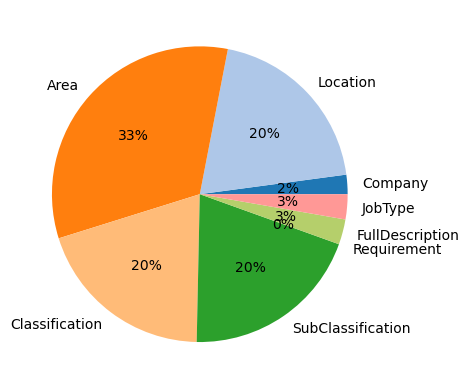

In [15]:
#This is not total missing data but their percentages within the missing data
per_nozero = per[per != 0]
plt.pie(per_nozero, labels=per_nozero.index, colors=colors, autopct='%.0f%%')
plt.show()

In [16]:
#Drop Area
df.drop('Area', axis=1, inplace=True)

In [17]:
df

Title  \
0                                Casual Stock Replenisher   
1                                Casual Stock Replenisher   
2       RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...   
3                                   Team member - Belrose   
4       Business Banking Contact Centre Specialist, Ni...   
...                                                   ...   
318472                  Program Manager - Trade Reporting   
318473            Web Content Writer - June 2019 contract   
318474              Brand Director - Global Premium Brand   
318475   Head of Financial Planning, Reporting & Strategy   
318476                           Head of Operations - EOI   

                                                  Company       Date  \
0                                             Aldi Stores 2018-10-07   
1                                             Aldi Stores 2018-10-07   
2                                     LB Creative Pty Ltd 2018-10-07   
3                                  Anaconda Group Pty Ltd 2018-10-07   
4          Commonwealth Bank - Business & Private Banking 2018-10-07   
...                                                   ...        ...   
318472                                            Talenza 2019-03-13   
318473  Talent – Winner ‘Seek Large Recruitment Agency... 2019-03-13   
318474                   Retail Career Consulting Pty Ltd 2019-03-12   
318475                                         Moir Group 2019-03-08   
318476                                 Austcorp Executive 2019-03-13   

                       Location                  Classification  \
0                        Sydney      Retail & Consumer Products   
1         Richmond & Hawkesbury      Retail & Consumer Products   
2                      Brisbane      Retail & Consumer Products   
3       Gosford & Central Coast      Retail & Consumer Products   
4                        Sydney  Call Centre & Customer Service   
...                         ...                             ...   
318472                      NaN                             NaN   
318473                      NaN                             NaN   
318474                      NaN                             NaN   
318475                      NaN                             NaN   
318476                      NaN                             NaN   

        SubClassification                                        Requirement  \
0       Retail Assistants  Our Casual Stock Replenishers pride themselves...   
1       Retail Assistants  Our Casual Stock Replenishers pride themselves...   
2       Retail Assistants  BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA   
3       Retail Assistants  Bring it on - do you love the great outdoors a...   
4         Sales - Inbound  We are seeking highly articulate, enthusiastic...   
...                   ...                                                ...   
318472                NaN  Our client is a large Financial Services firm ...   
318473                NaN  You will be able to write clearly and concisel...   
318474                NaN  Newly created Brand Director AUS. Must be comm...   
318475                NaN  High-quality manufacturing organisation. Excit...   
318476                NaN      Expressions of interest for a leadership role   

       FullDescription  LowestSalary  HighestSalary JobType  AverageSalary  
0                  NaN             0             30     NaN           15.0  
1                  NaN             0             30     NaN           15.0  
2                  NaN             0             30     NaN           15.0  
3                  NaN             0             30     NaN           15.0  
4                  NaN             0             30     NaN           15.0  
...                ...           ...            ...     ...            ...  
318472             NaN           200            999     NaN          599.5  
318473             NaN           200            999     NaN          599

# Data Analysis and Interpretation

## Job Metadata

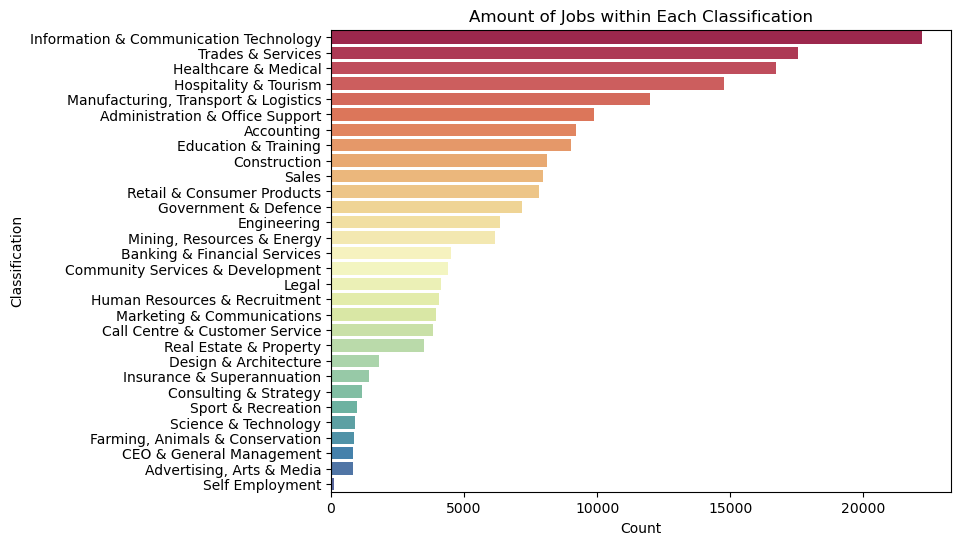

In [18]:
classificationDf = df[df['Classification'].isna()==False]
classificationDf = classificationDf.groupby('Classification').count()
classificationDf['Classification'] = classificationDf.index
classificationDf['Count'] = classificationDf["Title"]
classificationDf.sort_values("Count", ascending=False, inplace=True)
plt.figure(figsize=(8,6))
sns.barplot(data=classificationDf, x="Count", y="Classification", hue="Classification", palette='Spectral')
plt.title("Amount of Jobs within Each Classification")
plt.show()

In [19]:
classificationDf.shape

(30, 13)

In [20]:
subdf = df["SubClassification"].unique()
print("The Dataset contains a total of:", subdf.shape[0], "subclassifications")

The Dataset contains a total of: 339 subclassifications


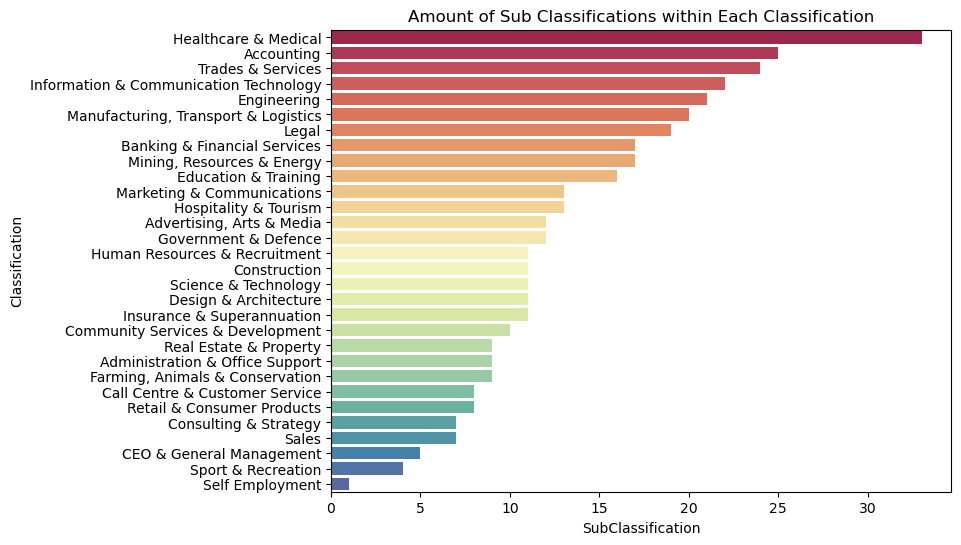

In [21]:
unique_subs = df.groupby("Classification")["SubClassification"].nunique()
unique_subs.sort_values(ascending=False, inplace=True)
unique_subs = unique_subs.reset_index()
unique_subs
plt.figure(figsize=(8,6))
sns.barplot(data=unique_subs, x="SubClassification", y="Classification", hue="Classification", palette='Spectral')
plt.title("Amount of Sub Classifications within Each Classification")
plt.show()

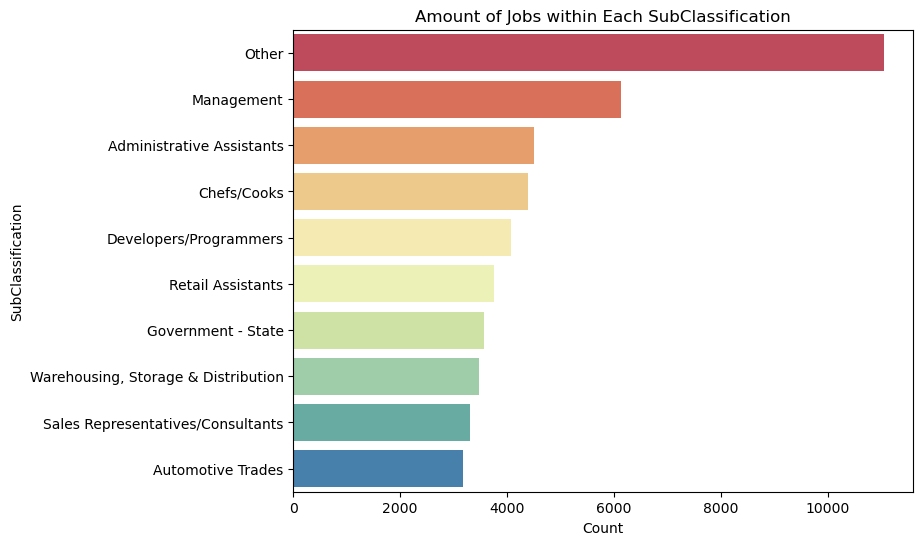

In [22]:
subclassDf = df[df['SubClassification'].isna()==False]
subclassDf = subclassDf.groupby('SubClassification').count()
subclassDf['SubClassification'] = subclassDf.index
subclassDf['Count'] = subclassDf["Title"]
subclassDf.sort_values("Count", ascending=False, inplace=True)
subclassDf10 = subclassDf.head(10)
plt.figure(figsize=(8,6))
sns.barplot(data=subclassDf10, x="Count", y="SubClassification", hue="SubClassification", palette='Spectral')
plt.title("Amount of Jobs within Each SubClassification")
plt.show()

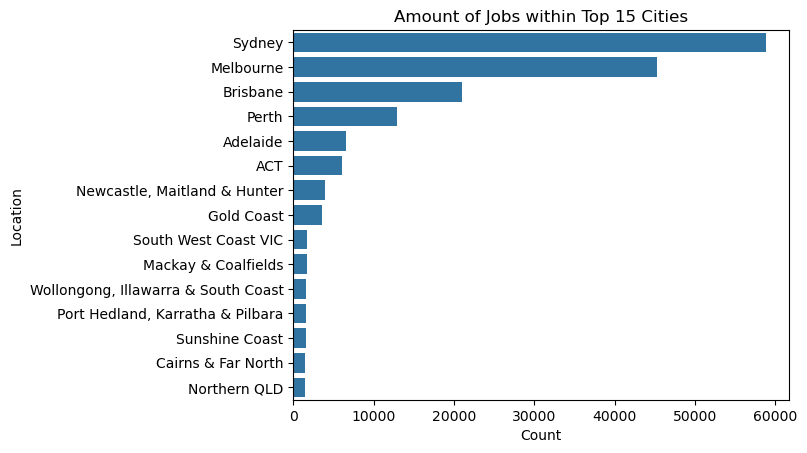

In [23]:
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Title"]
locationDf = locationDf.sort_values(by=["Count"], ascending =False)
locationTop15Df = locationDf[:15].copy()
plt.title("Amount of Jobs within Top 15 Cities")
sns.barplot(data=locationTop15Df, y="Location", x="Count")
plt.show()

In [24]:
locationDf.head(10)

Title  Company   Date  Classification  \
Location                                                              
Sydney                        58787    56959  58787           58787   
Melbourne                     45290    43555  45290           45290   
Brisbane                      21043    20194  21043           21043   
Perth                         12958    12535  12958           12958   
Adelaide                       6506     6158   6506            6506   
ACT                            6114     6017   6114            6114   
Newcastle, Maitland & Hunter   3890     3757   3890            3890   
Gold Coast                     3518     3280   3518            3518   
South West Coast VIC           1758     1588   1758            1758   
Mackay & Coalfields            1682     1635   1682            1682   

                              SubClassification  Requirement  FullDescription  \
Location                                                                        
Sydney                                    58787        58787            55554   
Melbourne                                 45290        45286            42488   
Brisbane                                  21043        21043            19815   
Perth                                     12958        12958            12061   
Adelaide                                   6506         6506             6168   
ACT                                        6114         6114             5671   
Newcastle, Maitland & Hunter               3890         3890             3658   
Gold Coast                                 3518         3518             3320   
South West Coast VIC                       1758         1758             1642   
Mackay & Coalfields                        1682         1682             1579   

                              LowestSalary  HighestSalary  JobType  \
Location                                                             
Sydney                               58787          58787    55568   
Melbourne                            45290          45290    42494   
Brisbane                             21043          21043    19821   
Perth                                12958          12958    12072   
Adelaide                              6506           6506     6169   
ACT                                   6114           6114     5673   
Newcastle, Maitland & Hunter          3890           3890     3659   
Gold Coast                            3518           3518     3320   
South West Coast VIC                  1758           1758     1650   
Mackay & Coalfields                   1682           1682     1579   

                              AverageSalary                      Location  \
Location                                                                    
Sydney                                58787                        Sydney   
Melbourne                             45290                     Melbourne   
Brisbane                              21043                      Brisbane   
Perth                                 12958                         Perth   
Adelaide                               6506                      Adelaide   
ACT                                    6114                           ACT   
Newcastle, Maitland & Hunter           3890  Newcastle, Maitland & Hunter   
Gold Coast                             3518                    Gold Coast   
South West Coast VIC                   1758          South West Coast VIC   
Mackay & Coalfields                    1682           Mackay & Coalfields   

                              Count  
Location                             
Sydney                        58787  
Melbourne                     45290  
Brisbane                      21043  
Perth                         12958  
Adelaide                       6506  
ACT                            6114  
Newcastle, Maitland & Hunter   3890  
Gold Coast                     3518  
South West Coast VIC           1758  
Mackay & Coalfields 

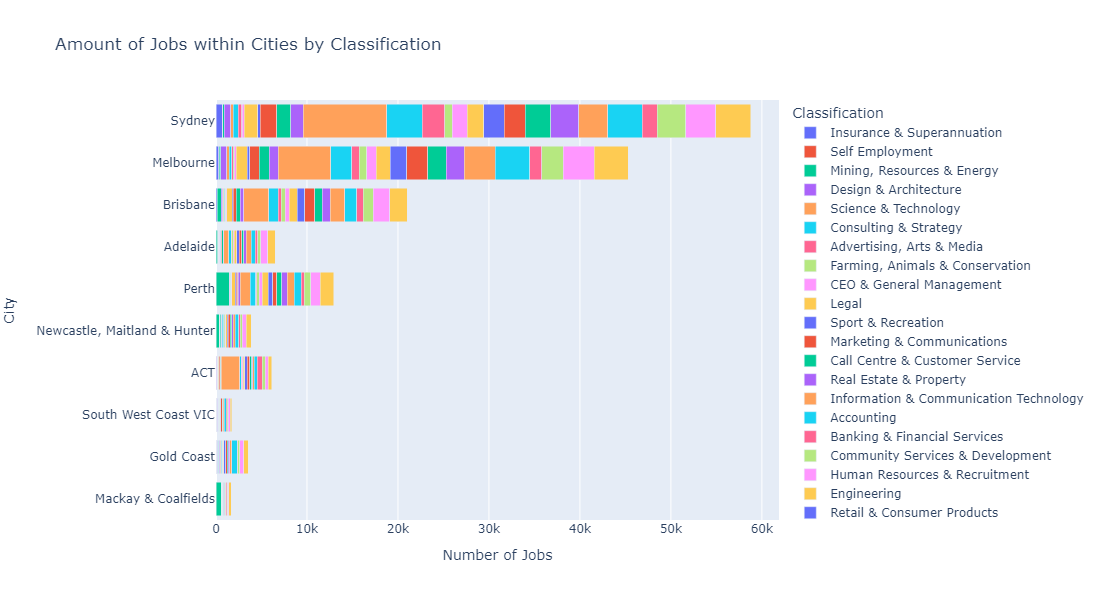

In [25]:
top10city = locationDf.head(10)
mergedf = pd.merge(df, top10city[['Count']], left_on='Location', right_index=True)
groupdf = mergedf.groupby(['Location', 'Classification']).size().reset_index(name='Count')
groupdf = groupdf.sort_values(by='Count', ascending=True)

fig = px.bar(groupdf, y='Location', x='Count', color='Classification', 
             title='Amount of Jobs within Cities by Classification',
             labels={'Count': 'Number of Jobs', 'Location': 'City', 'Classification': 'Classification'},
             barmode='stack')

fig.update_xaxes(title_text='Number of Jobs')
fig.update_yaxes(title_text='City')

fig.update_layout(height=600,  width=1000)
fig.show()


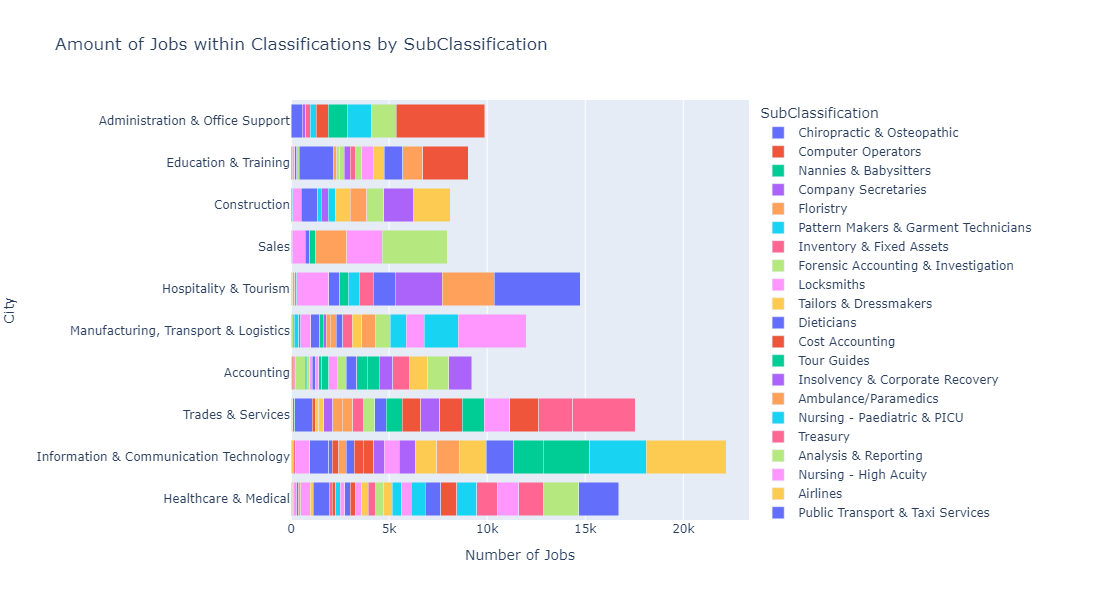

In [26]:
top10class = classificationDf.head(10)
mergedf = pd.merge(df, top10class[['Count']], left_on='Classification', right_index=True)
groupdf = mergedf.groupby(['Classification', 'SubClassification']).size().reset_index(name='Count')
groupdf = groupdf.sort_values(by='Count', ascending=True)

fig = px.bar(groupdf, y='Classification', x='Count', color='SubClassification', 
             title='Amount of Jobs within Classifications by SubClassification',
             labels={'Count': 'Number of Jobs', 'Classification': 'Classification', 'SubClassification': 'SubClassification'},
             barmode='stack')

fig.update_xaxes(title_text='Number of Jobs')
fig.update_yaxes(title_text='City')

fig.update_layout(height=600,  width=1000)
fig.show()


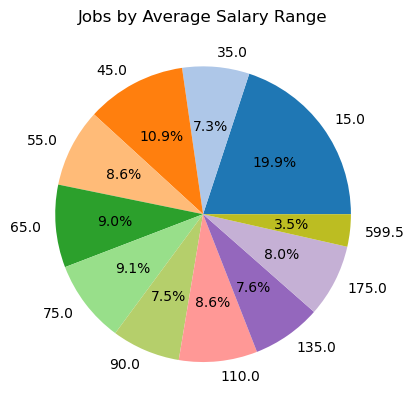

In [27]:
salary_data = df['AverageSalary'].value_counts().reset_index()
salary_data.columns = ["AverageSalary", "Count"]
salary_data = salary_data.sort_values(by=["AverageSalary"], ascending =True)

plt.pie(salary_data["Count"], labels=salary_data['AverageSalary'], autopct='%1.1f%%', colors=colors)
plt.title("Jobs by Average Salary Range")
plt.show()

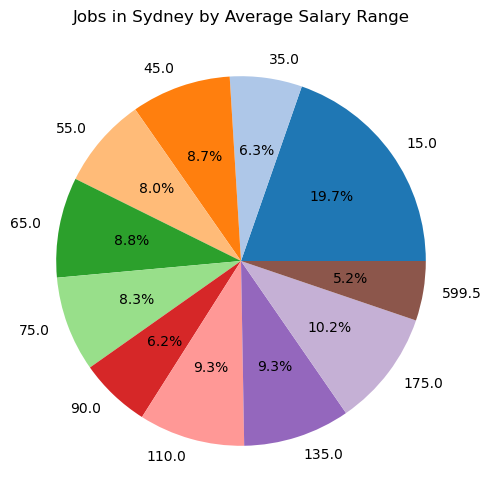

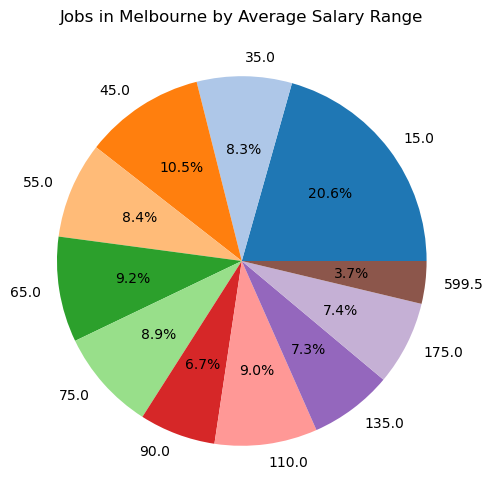

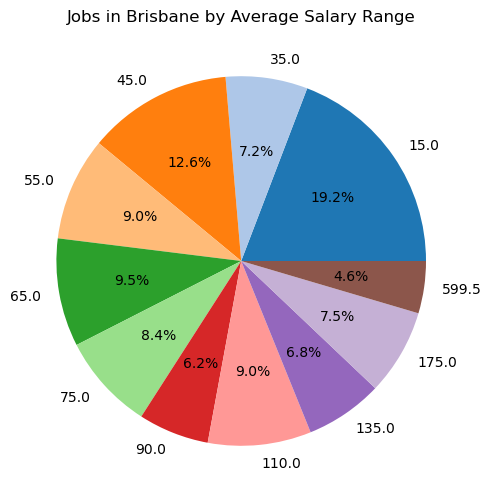

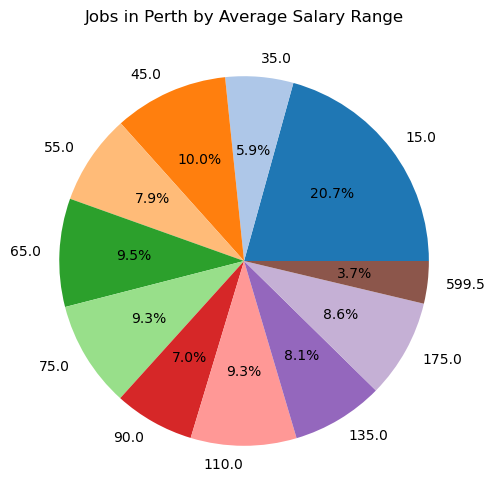

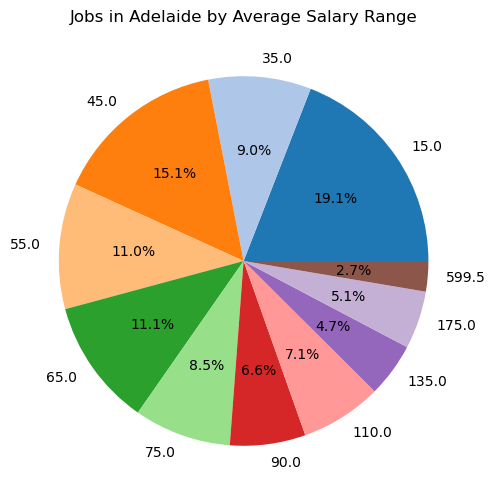

In [28]:
top5cities = locationDf.head(5)
colors=plt.cm.tab20.colors
for city in top5cities.index:
    citydf = df[df['Location'] == city]
    
    salary_data = citydf['AverageSalary'].value_counts().reset_index()
    salary_data.columns = ["AverageSalary", "Count"]
    salary_data = salary_data.sort_values(by=["AverageSalary"], ascending=True)
    
    plt.figure(figsize=(6, 6))
    plt.pie(salary_data["Count"], labels=salary_data['AverageSalary'], autopct='%1.1f%%', colors=colors)
    plt.title(f"Jobs in {city} by Average Salary Range")
    plt.show()


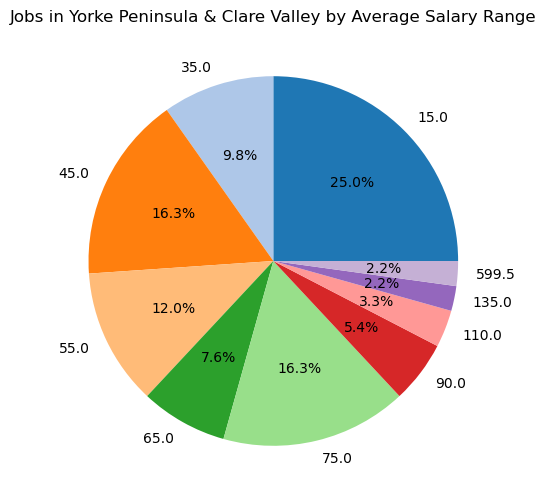

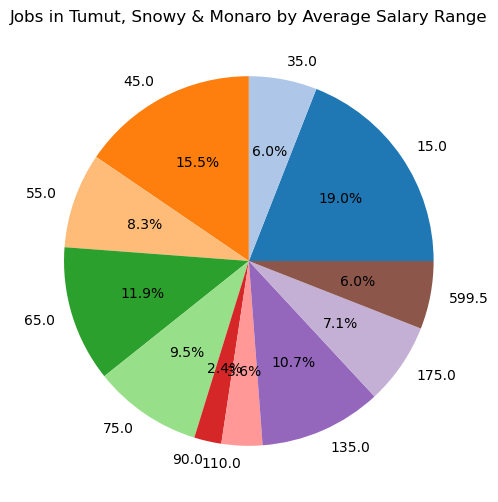

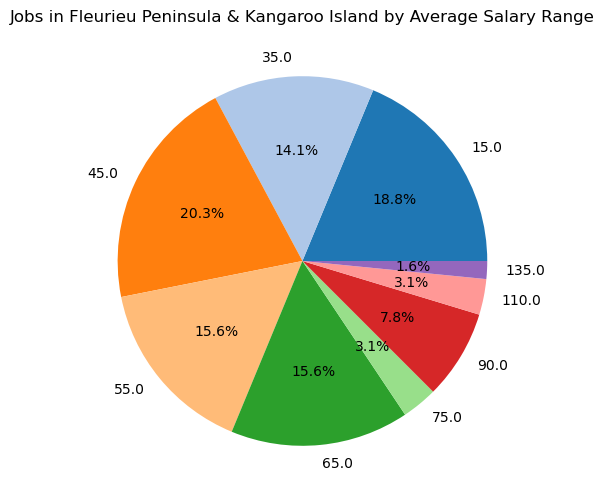

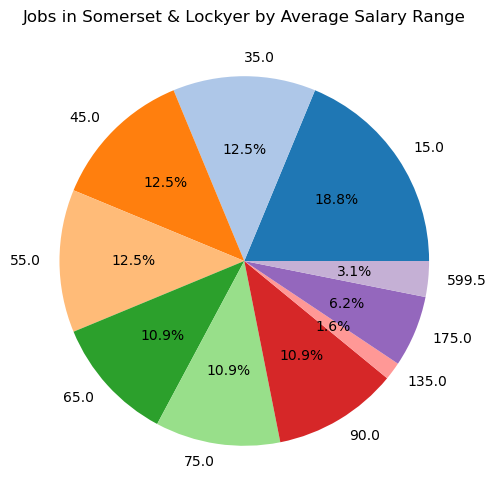

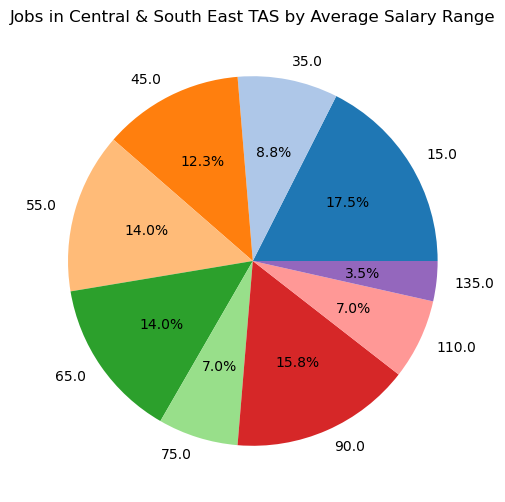

In [29]:
bot5cities = locationDf.tail(5)
colors=plt.cm.tab20.colors
for city in bot5cities.index:
    citydf = df[df['Location'] == city]
    
    salary_data = citydf['AverageSalary'].value_counts().reset_index()
    salary_data.columns = ["AverageSalary", "Count"]
    salary_data = salary_data.sort_values(by=["AverageSalary"], ascending=True)
    
    plt.figure(figsize=(6, 6))
    plt.pie(salary_data["Count"], labels=salary_data['AverageSalary'], autopct='%1.1f%%', colors=colors)
    plt.title(f"Jobs in {city} by Average Salary Range")
    plt.show()


## Study market by Locations

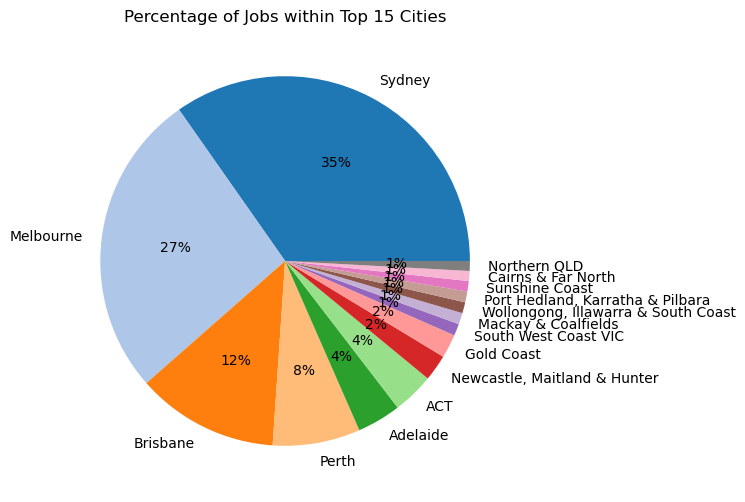

In [30]:
plt.figure(figsize=(8,6))
plt.title("Percentage of Jobs within Top 15 Cities")
plt.pie(locationTop15Df["Count"], labels=locationTop15Df['Location'], colors=colors, autopct='%.0f%%')
plt.show()

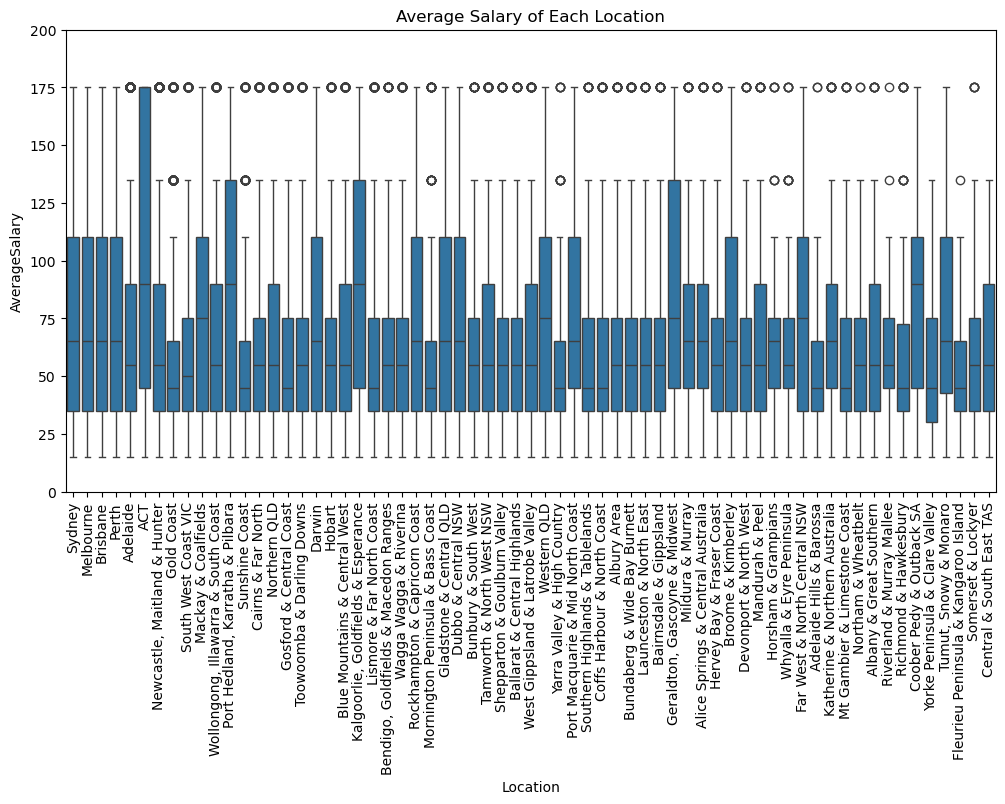

In [31]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Location", y="AverageSalary", order=locationDf["Location"])
plt.ylim(0, 200)
plt.xticks(rotation=90)
plt.title("Average Salary of Each Location")
plt.show()

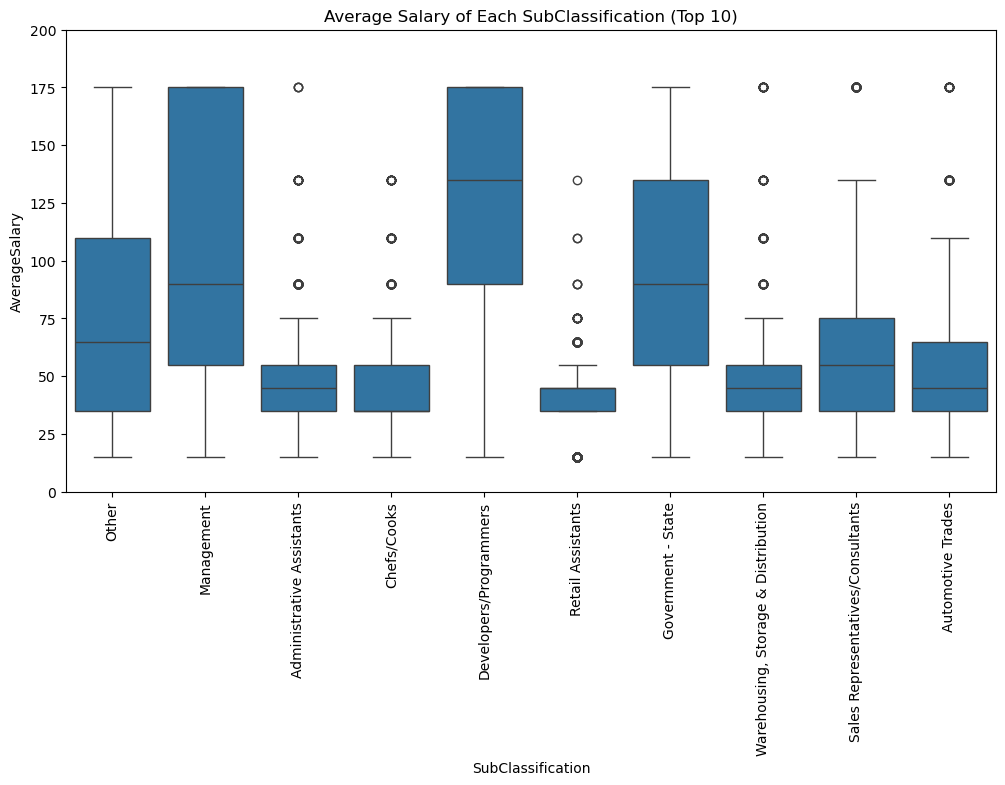

In [49]:
subclass_counts = df['SubClassification'].value_counts().reset_index()
subclass_counts.columns = ['SubClassification', 'JobCount']
top10subclassifications = subclass_counts.head(10)['SubClassification'].tolist()


df_top10 = df[df['SubClassification'].isin(top10subclassifications)]


plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top10, x="SubClassification", y="AverageSalary", order=top10subclassifications)
plt.ylim(0, 200)
plt.xticks(rotation=90)
plt.title("Average Salary of Each SubClassification (Top 10)")
plt.show()


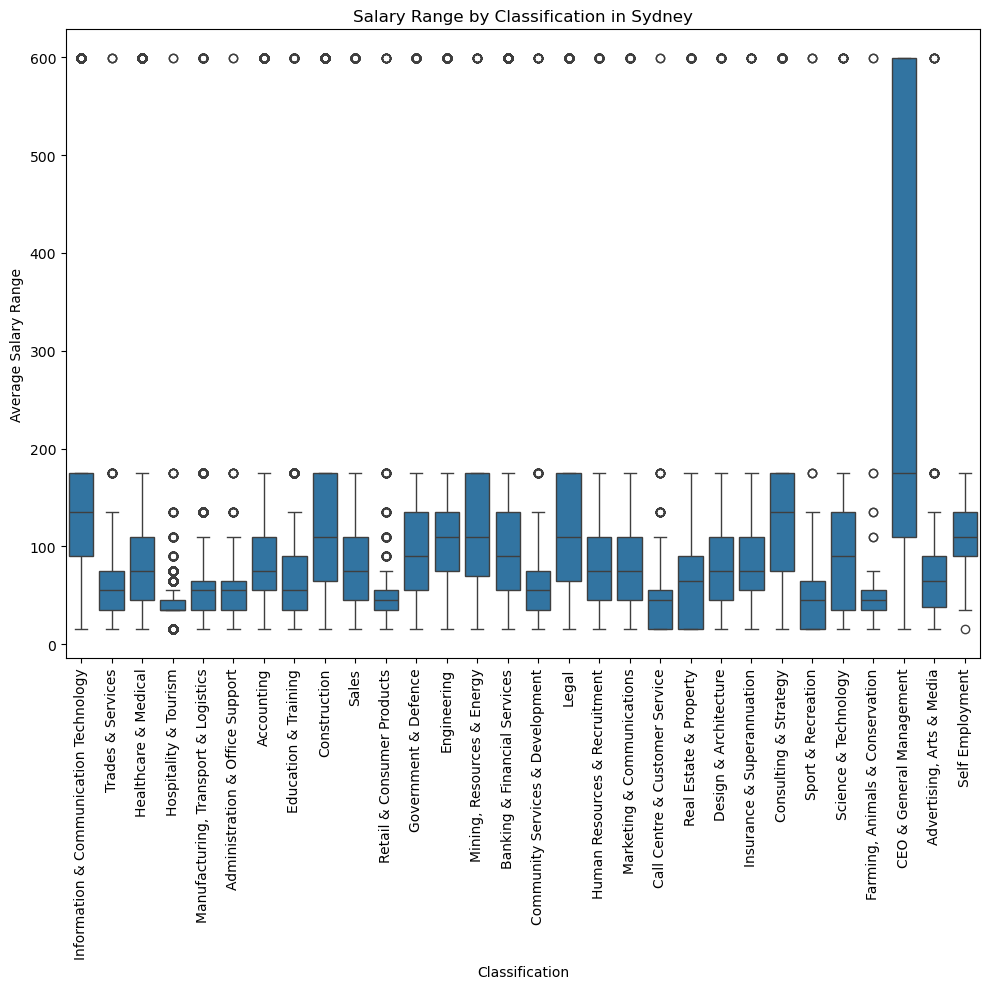

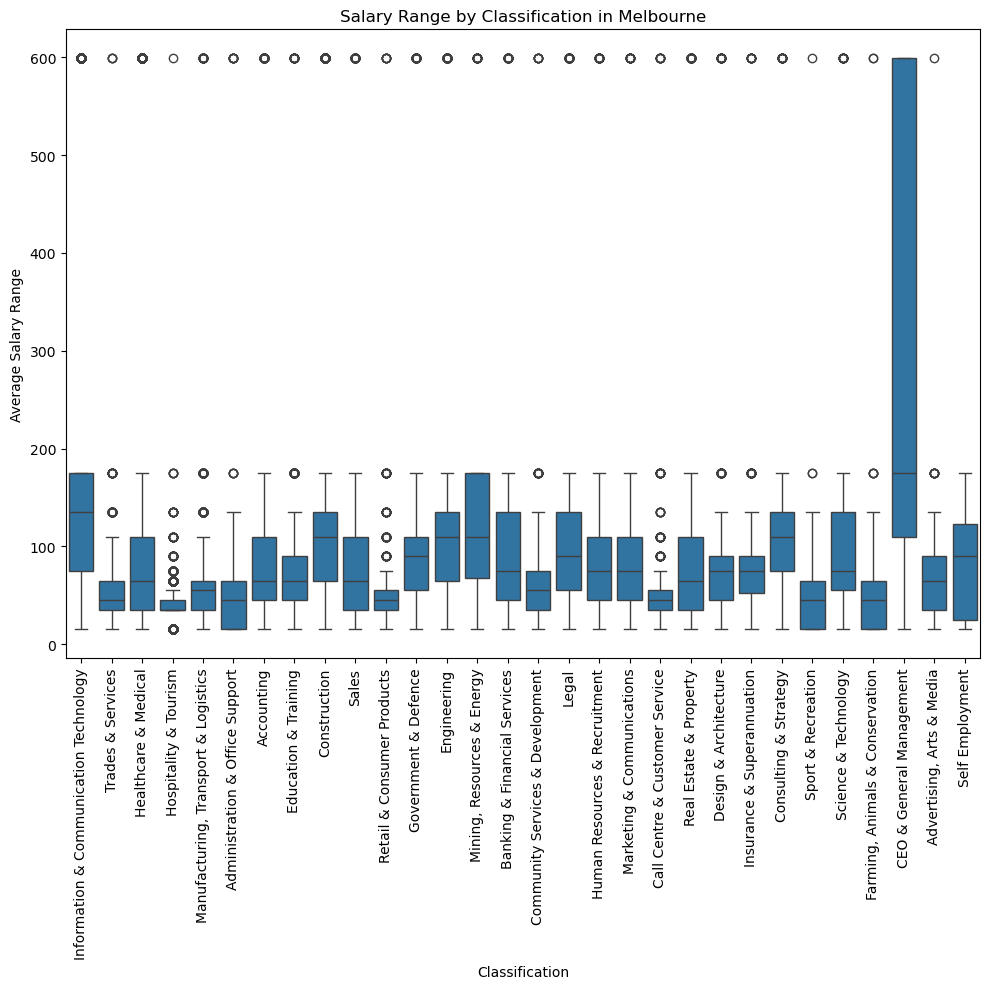

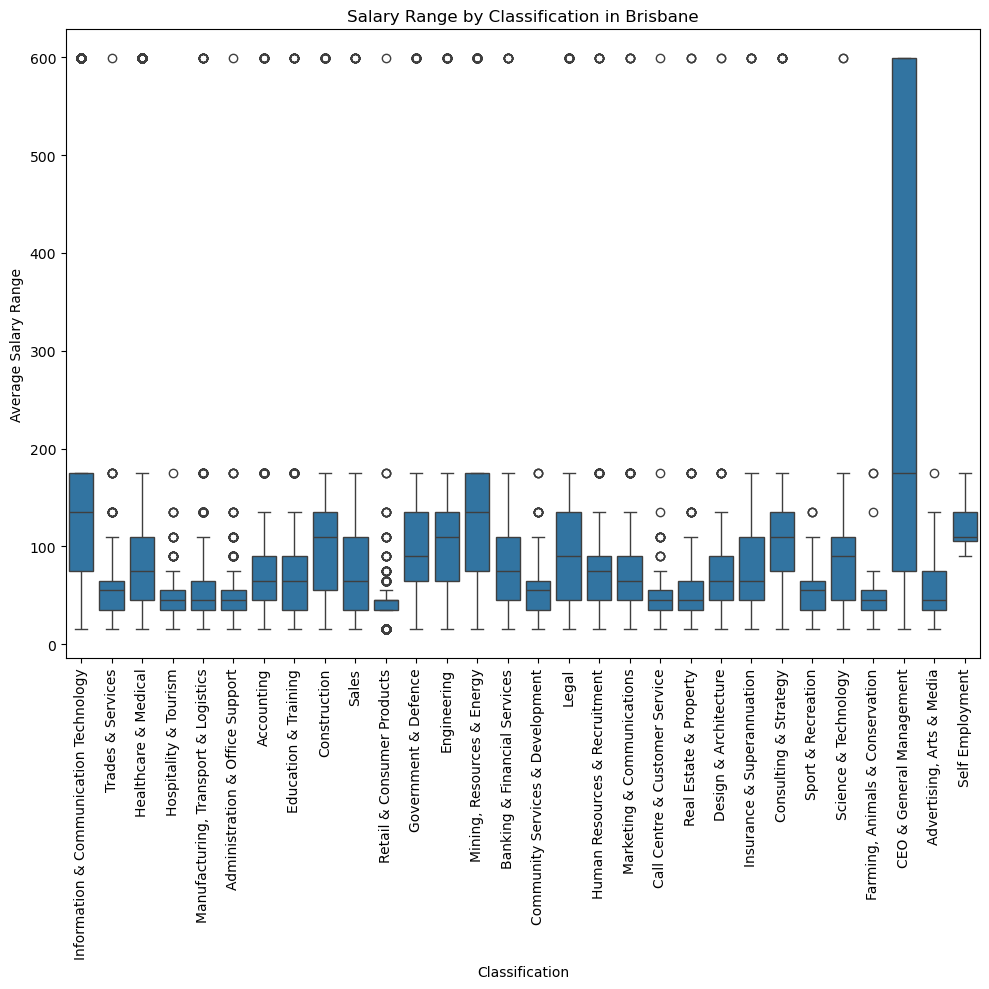

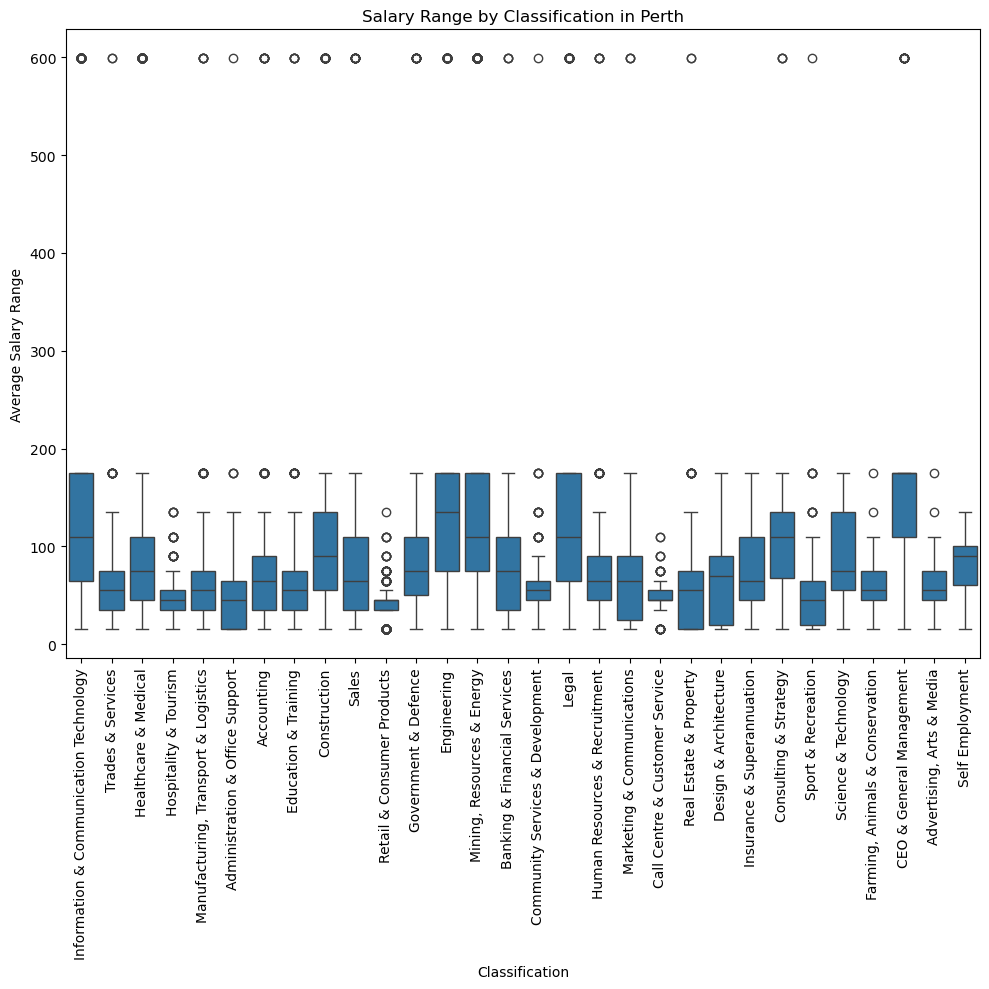

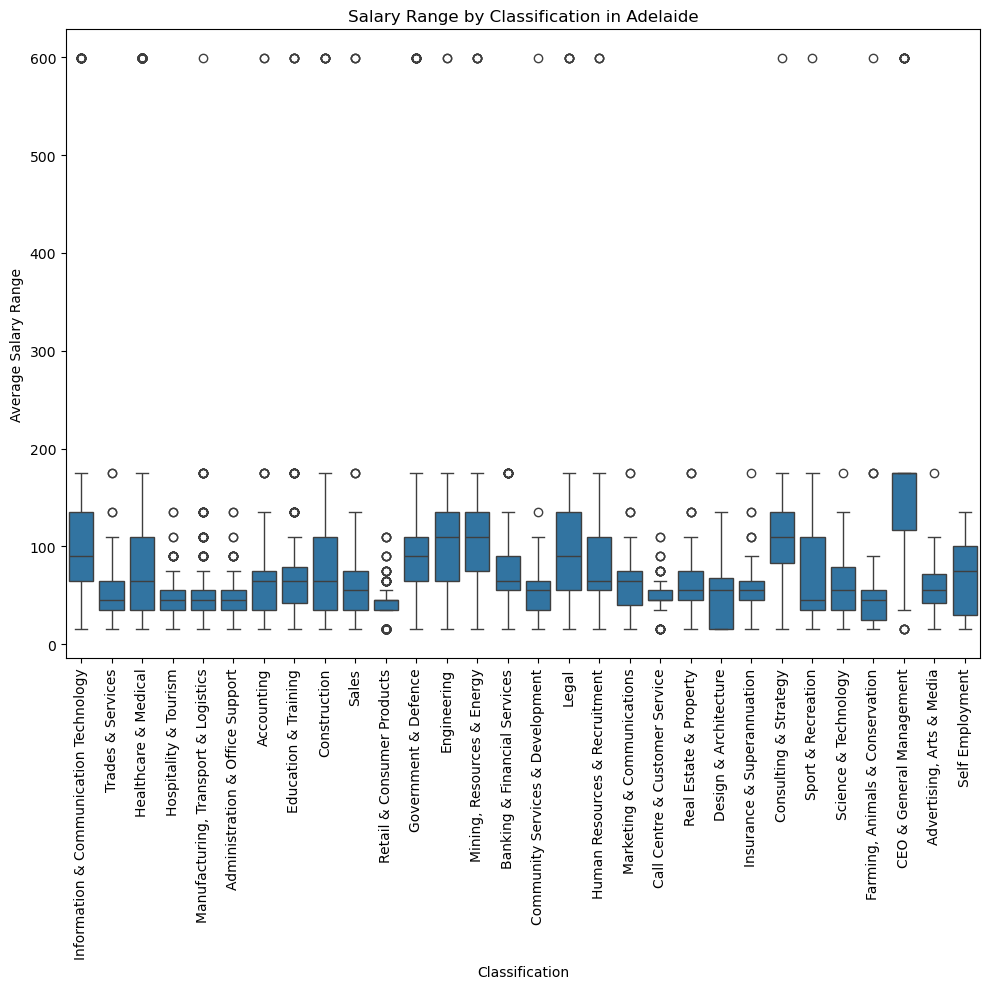

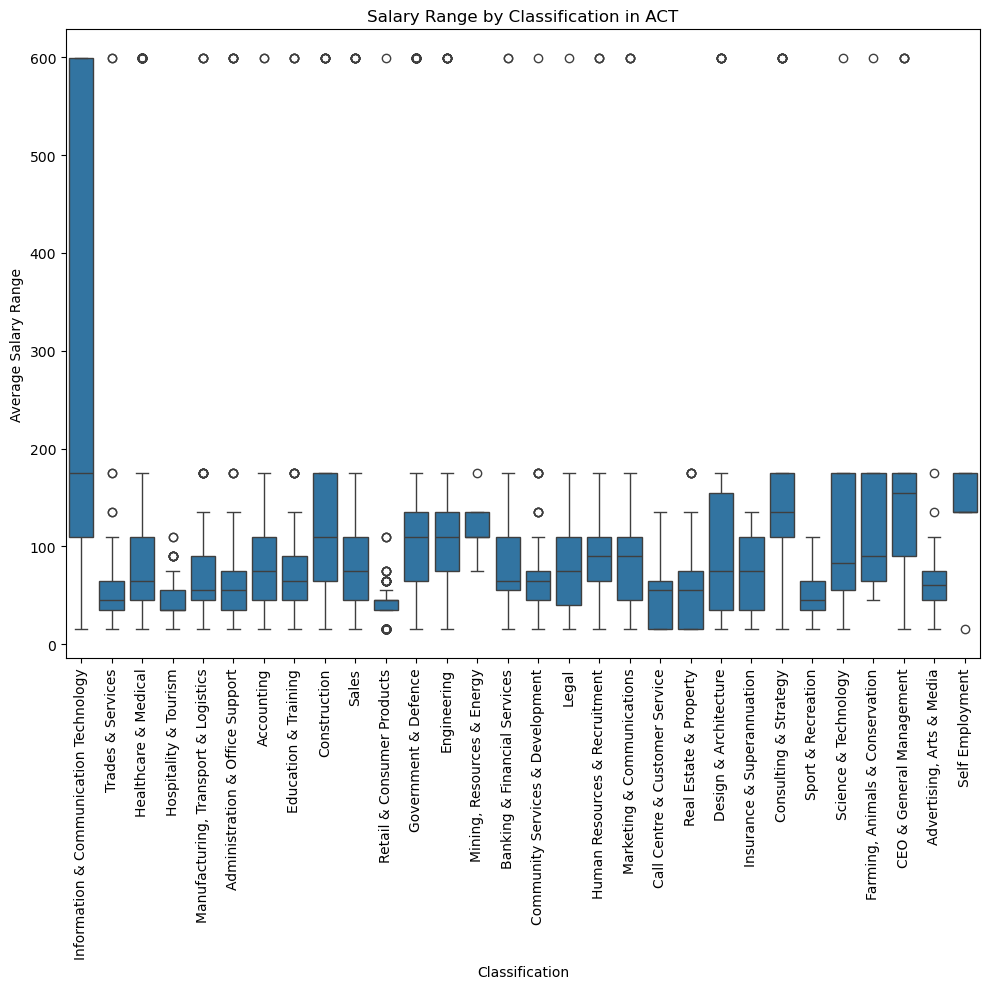

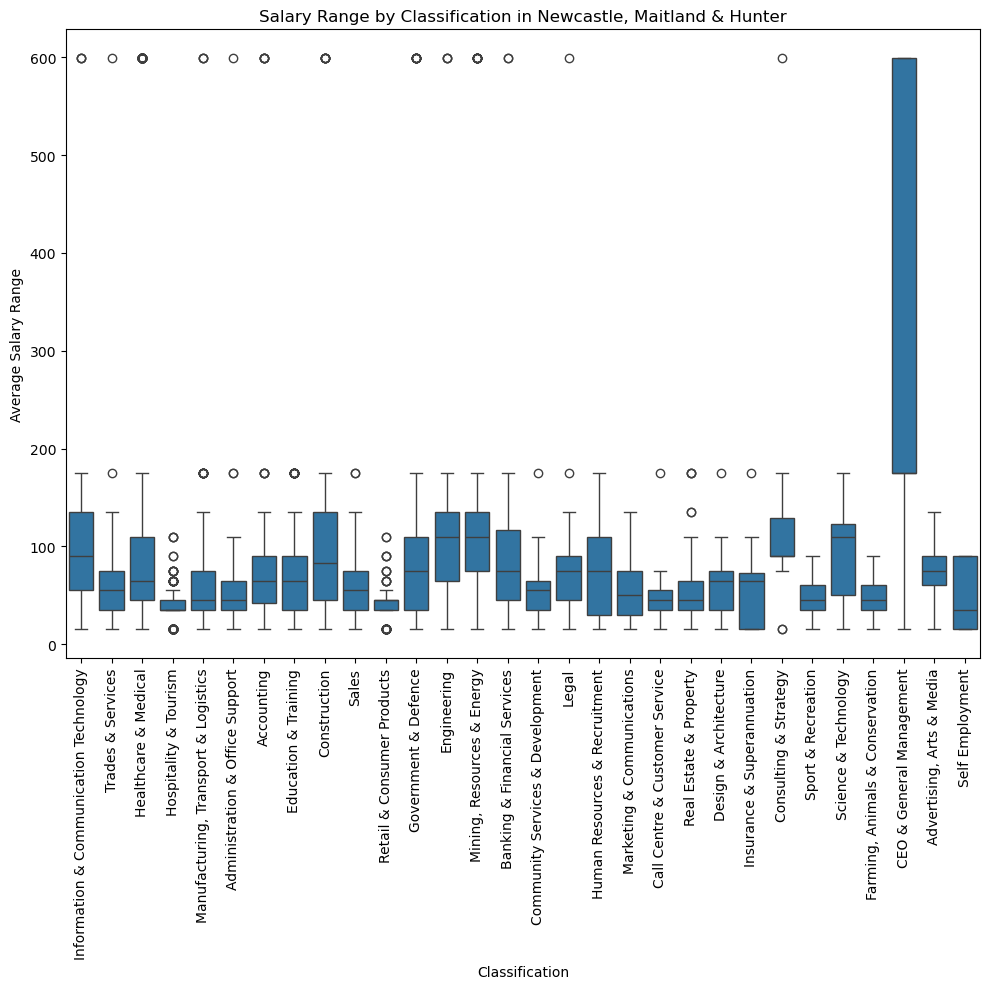

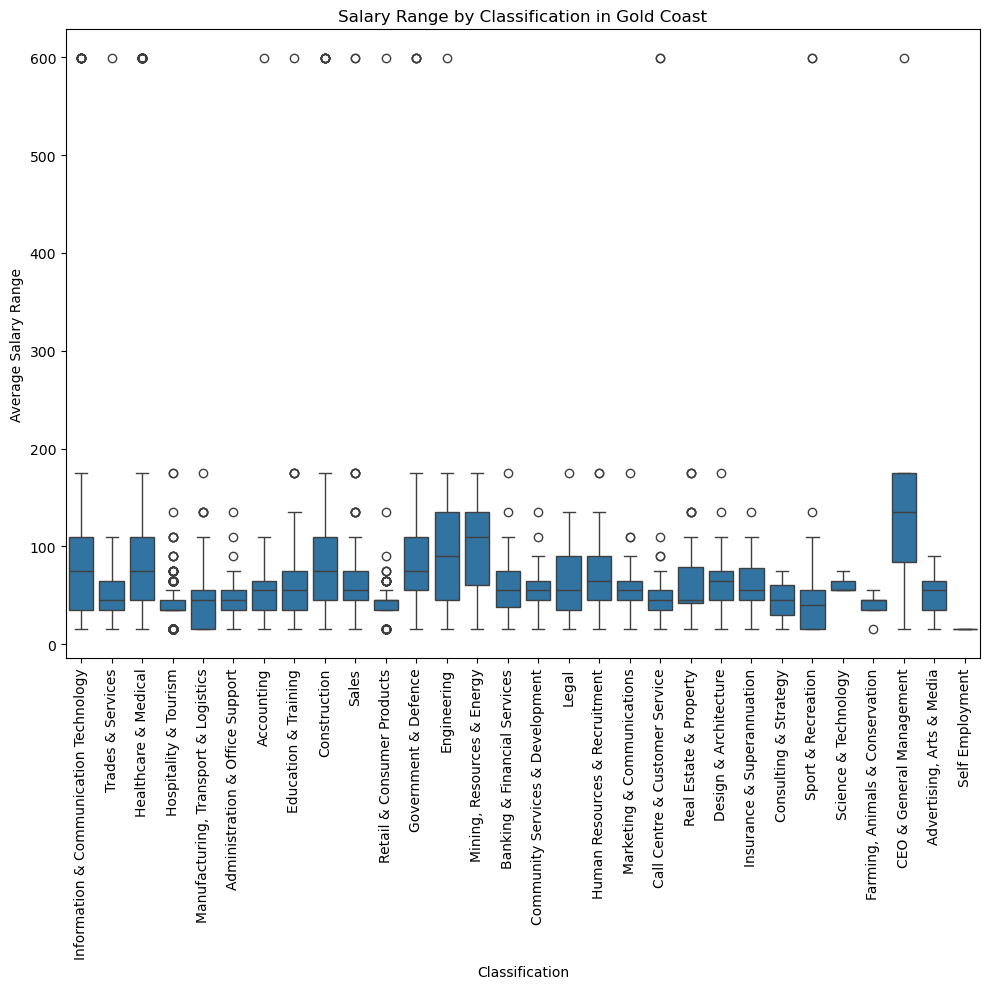

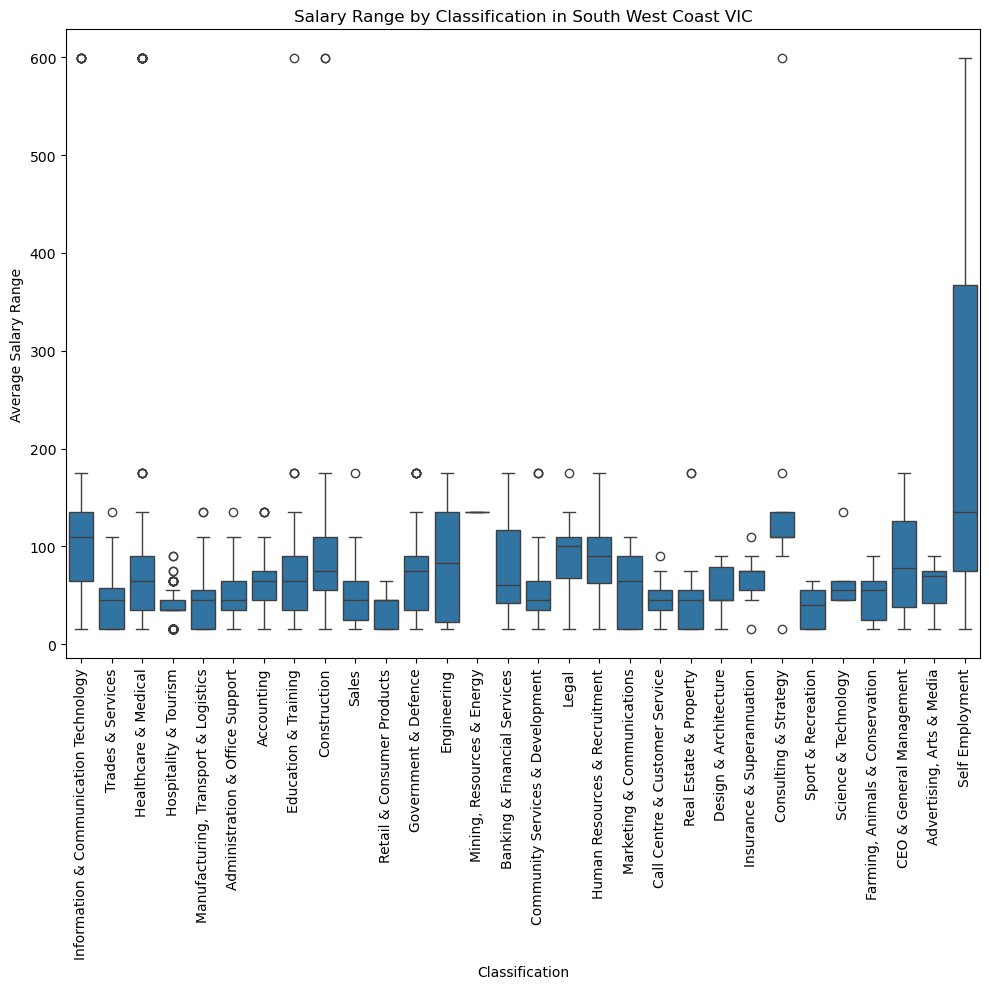

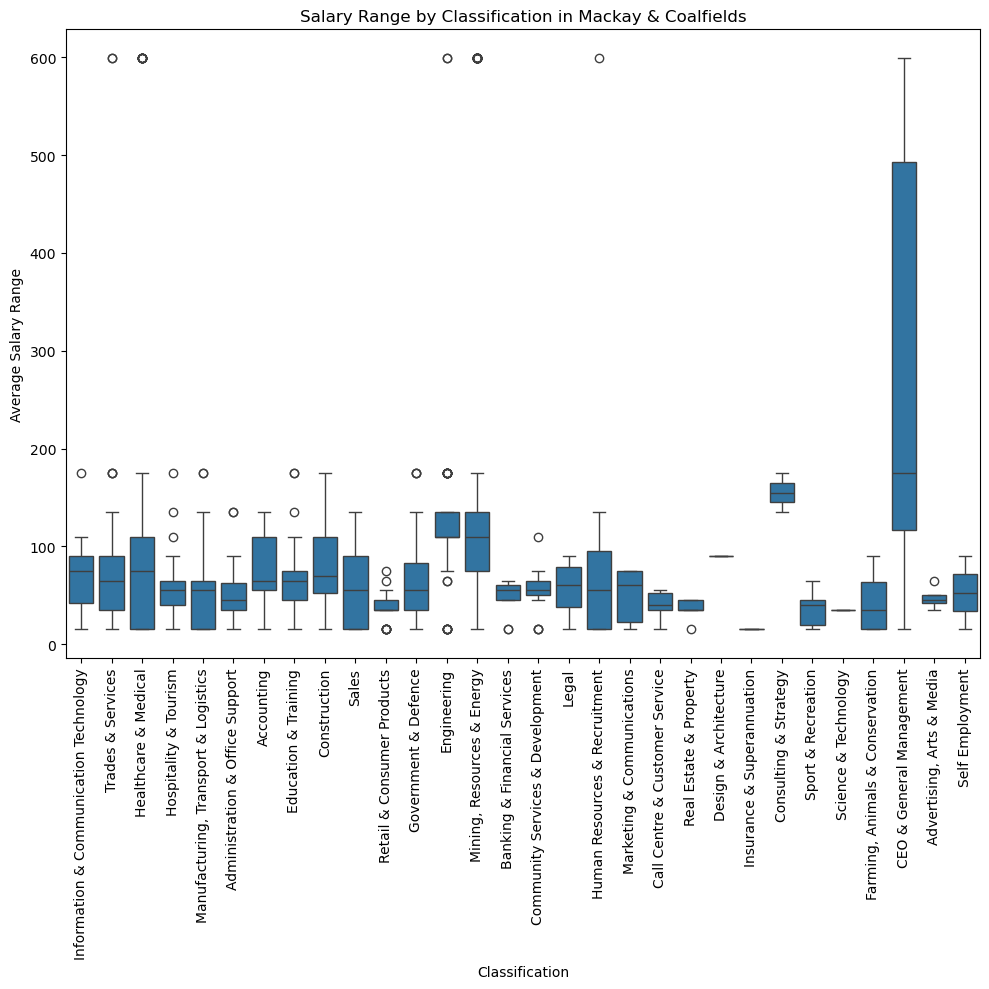

In [32]:
theclassdf = df.groupby('Classification')
classorderdf = pd.DataFrame(theclassdf.size().reset_index(name = "Jobs")).sort_values(by=['Jobs'], ascending=False)

locationDf = df[df['Location'].notna()]
locationCounts = locationDf['Location'].value_counts()

top10_locations = locationCounts.head(10).index.tolist()

top10_df = locationDf[locationDf['Location'].isin(top10_locations)]

for location in top10_locations:
    plt.figure(figsize=(10, 10))
    location_data = top10_df[top10_df['Location'] == location]
    sns.boxplot(data=location_data, x='Classification', y='AverageSalary', order=classorderdf["Classification"])
    plt.title(f'Salary Range by Classification in {location}')
    plt.xlabel('Classification')
    plt.ylabel('Average Salary Range')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


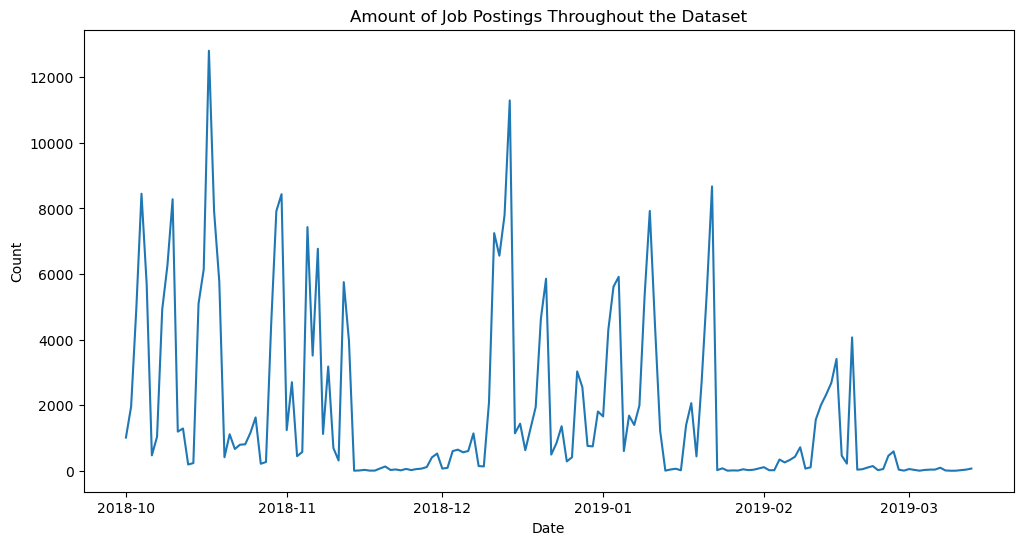

In [33]:
dateDf = df['Date'].value_counts().reset_index()
dateDf.columns = ["Date", "Count"]
dateDf = dateDf.sort_values(by="Date")
dateDf = dateDf.reset_index(drop=True)
period = dateDf[(dateDf["Date"] >= "2018-01-01") & (dateDf["Date"] <= "2020-01-01")]
plt.figure(figsize=(12,6))
plt.plot(period["Date"], period["Count"])
plt.title("Amount of Job Postings Throughout the Dataset")
plt.ylabel("Count")
plt.xlabel("Date")
plt.show()

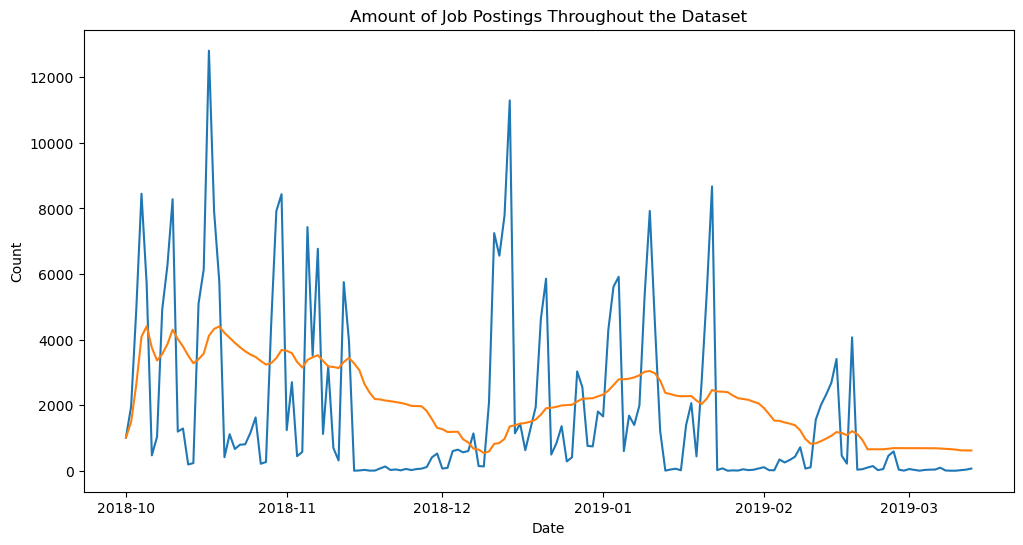

In [34]:
period['Moving_Average'] = period['Count'].rolling(window=30, min_periods=1).mean()

plt.figure(figsize=(12,6))
plt.plot(period["Date"], period["Count"])
plt.plot(period["Date"], period["Moving_Average"])
plt.title("Amount of Job Postings Throughout the Dataset")
plt.ylabel("Count")
plt.xlabel("Date")
plt.show()

In [35]:
theclassdf = df.groupby('Classification')
classorderdf = pd.DataFrame(theclassdf.size().reset_index(name = "Jobs")).sort_values(by=['Jobs'], ascending=False)
classorderdf

Classification   Jobs
17  Information & Communication Technology  22182
29                       Trades & Services  17545
14                    Healthcare & Medical  16721
15                   Hospitality & Tourism  14752
20    Manufacturing, Transport & Logistics  11994
1          Administration & Office Support   9882
0                               Accounting   9220
10                    Education & Training   9026
7                             Construction   8116
25                                   Sales   7955
24              Retail & Consumer Products   7801
13                    Government & Defence   7165
11                             Engineering   6351
22              Mining, Resources & Energy   6172
3             Banking & Financial Services   4498
6         Community Services & Development   4408
19                                   Legal   4132
16           Human Resources & Recruitment   4061
21              Marketing & Communications   3935
5           Call Centre & Customer Service   3823
23                  Real Estate & Property   3504
9                    Design & Architecture   1792
18              Insurance & Superannuation   1419
8                    Consulting & Strategy   1164
28                      Sport & Recreation    965
26                    Science & Technology    891
12         Farming, Animals & Conservation    868
4                 CEO & General Management    834
2                Advertising, Arts & Media    826
27                         Self Employment     93

In [36]:
top10class = classorderdf.sort_values(by='Jobs', ascending=False).head(10)['Classification']
top10class

17    Information & Communication Technology
29                         Trades & Services
14                      Healthcare & Medical
15                     Hospitality & Tourism
20      Manufacturing, Transport & Logistics
1            Administration & Office Support
0                                 Accounting
10                      Education & Training
7                               Construction
25                                     Sales
Name: Classification, dtype: object

In [37]:
bot10class = classorderdf.sort_values(by='Jobs', ascending=False).tail(10)['Classification']
bot10class

23             Real Estate & Property
9               Design & Architecture
18         Insurance & Superannuation
8               Consulting & Strategy
28                 Sport & Recreation
26               Science & Technology
12    Farming, Animals & Conservation
4            CEO & General Management
2           Advertising, Arts & Media
27                    Self Employment
Name: Classification, dtype: object

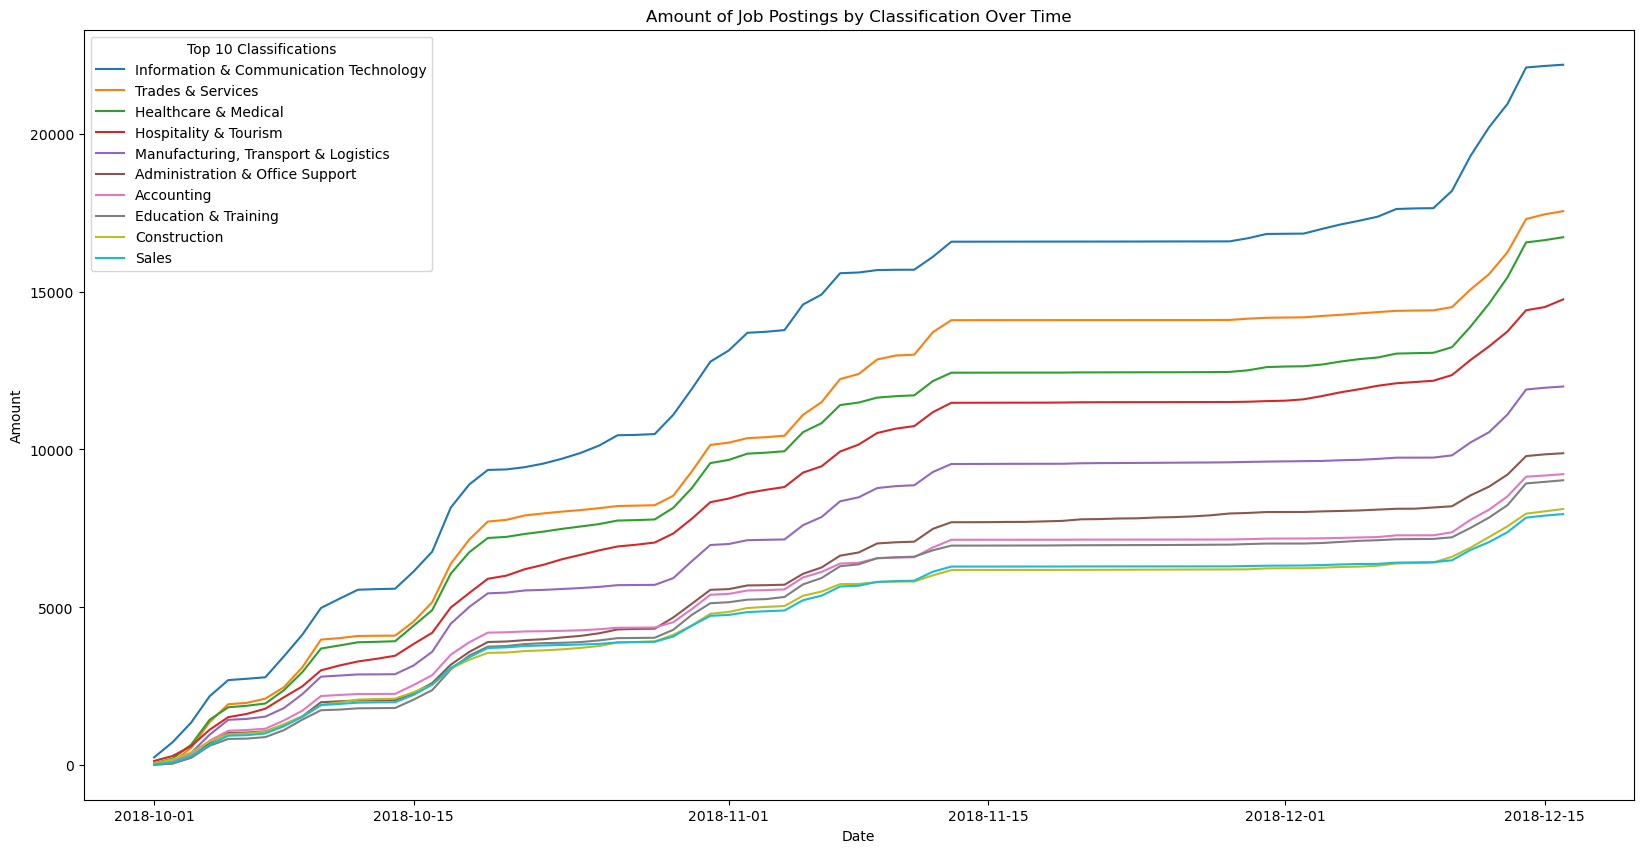

In [38]:
postingdf = df[df['Classification'].isna()==False].groupby(['Date', 'Classification'])['Title'].count().reset_index()
postingdf = postingdf[postingdf['Classification'].isin(top10class)]
postingdf = postingdf.groupby(['Classification','Date'])['Title'].sum().groupby(level=0).cumsum().reset_index()
postingdf.columns = ['Classification', 'Date', 'Amount']
postingdf.set_index('Date', inplace=True)


plt.figure(figsize=(20, 10))
classorder = postingdf.groupby('Classification')['Amount'].max().sort_values(ascending=False).index
colors = plt.cm.tab10.colors
for i, c in enumerate(classorder):
    plt.plot(postingdf[postingdf['Classification']==c]['Amount'], label=c, color=colors[i])

plt.title('Amount of Job Postings by Classification Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend(title="Top 10 Classifications")

plt.show()

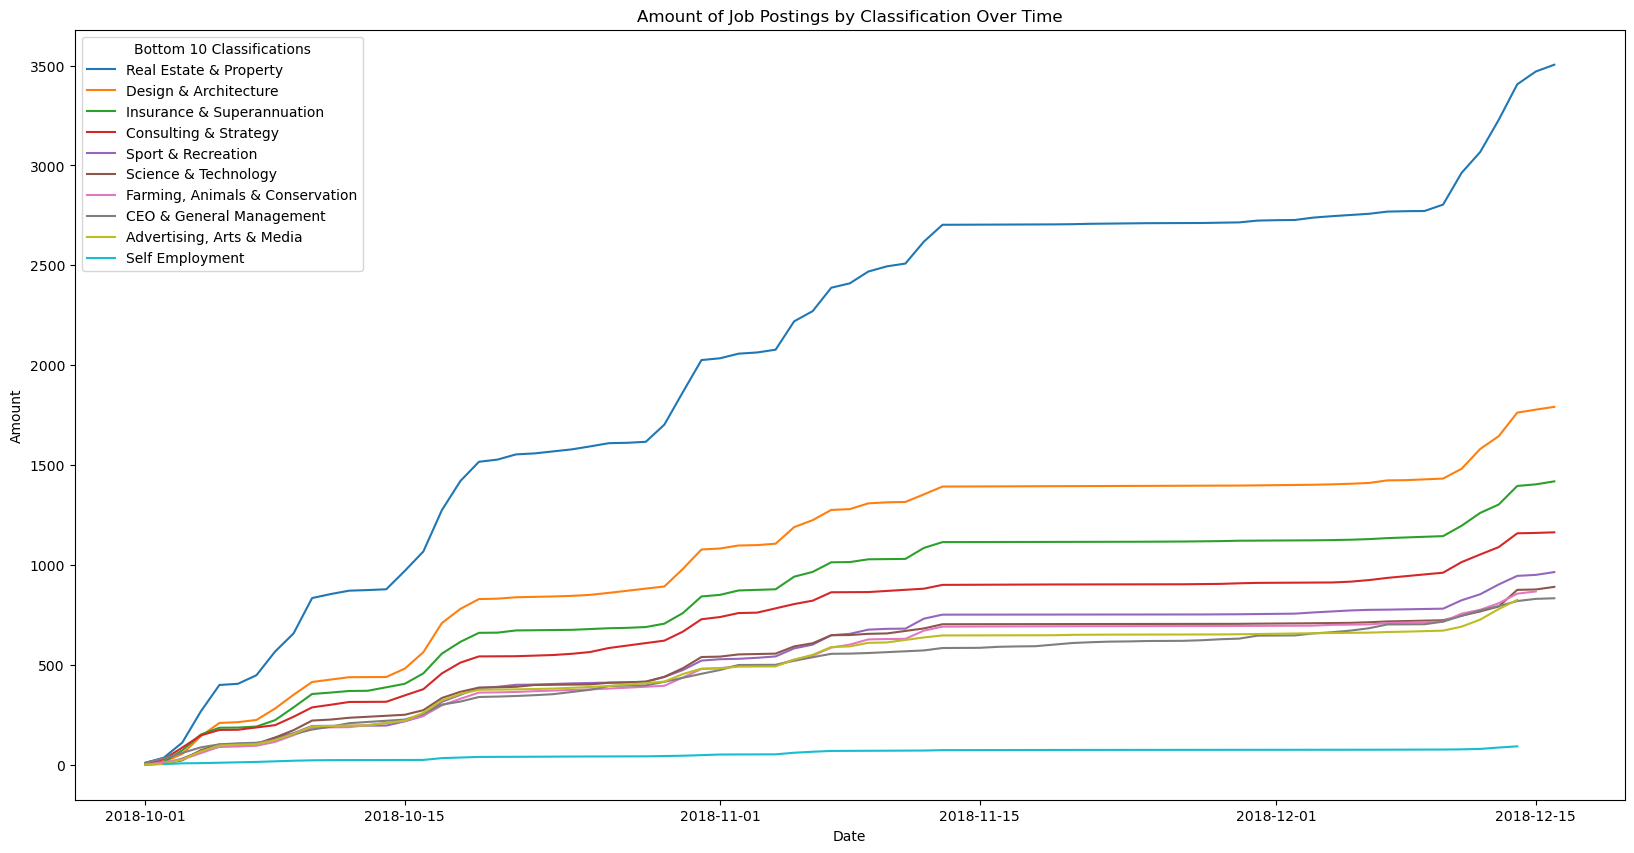

In [39]:
postingdf = df[df['Classification'].isna()==False].groupby(['Date', 'Classification'])['Title'].count().reset_index()
postingdf = postingdf[postingdf['Classification'].isin(bot10class)]
postingdf = postingdf.groupby(['Classification','Date'])['Title'].sum().groupby(level=0).cumsum().reset_index()
postingdf.columns = ['Classification', 'Date', 'Amount']
postingdf.set_index('Date', inplace=True)


plt.figure(figsize=(20, 10))
classorder = postingdf.groupby('Classification')['Amount'].max().sort_values(ascending=False).index
colors = plt.cm.tab10.colors
for i, c in enumerate(classorder):
    plt.plot(postingdf[postingdf['Classification']==c]['Amount'], label=c, color=colors[i])

plt.title('Amount of Job Postings by Classification Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend(title="Bottom 10 Classifications")

plt.show()

## Study Market by Classifications

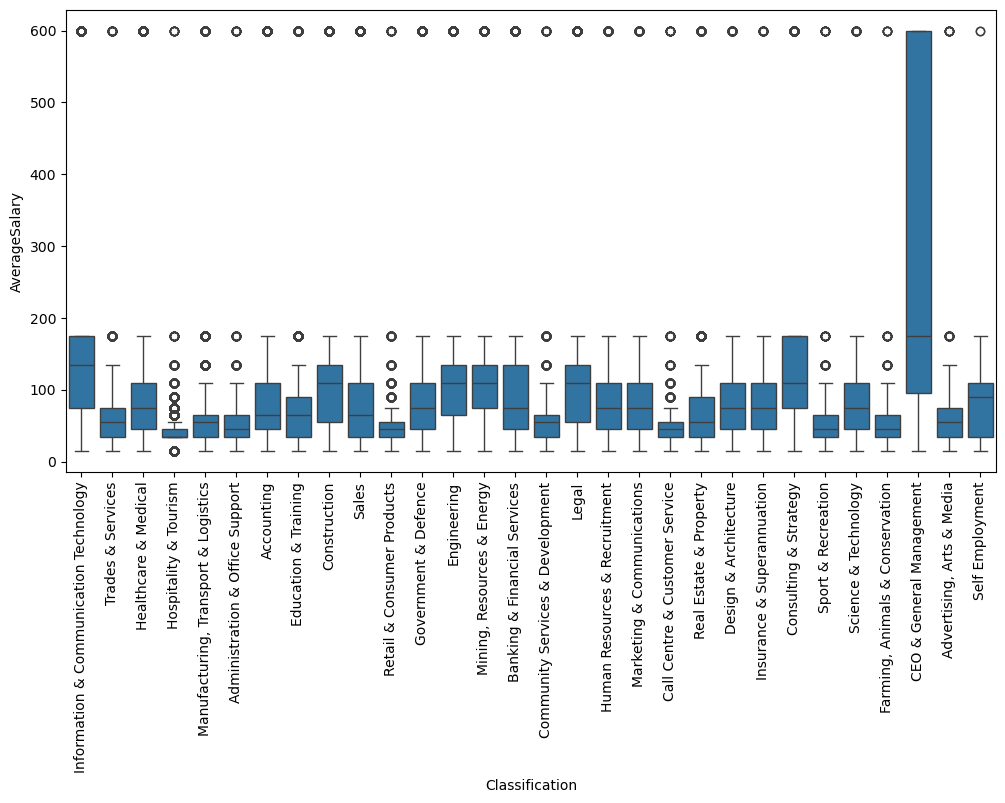

In [40]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Classification", y="AverageSalary", order=classificationDf["Classification"])
plt.xticks(rotation=90)
plt.show()

Detect which skills are required in each sector?

In [41]:
skillictdf = df[df["Classification"] == "Healthcare & Medical"]
skillictdf = skillictdf["Requirement"].reset_index()
#skillictdf.drop("index", axis=1,inplace=True)
skillictdf

index                                        Requirement
0          75  Part Time Dental Assistant (Qualified or Train...
1          94  We are a friendly community pharmacy looking f...
2         108  Locum Physiotherapist needed to cover existing...
3         113  Good qualified & experienced Pharmacy staff ar...
4         115  Full Time, fixed term until January 2021\n80 h...
...       ...                                                ...
16716  197219  Coal Services Health are looking for a Medical...
16717  197220  Coal Services Health are looking for a Medical...
16718  197221  Full Time General Practitioner with no restric...
16719  197226  Responsible for providing surgical procedures ...
16720  197227  Provide your expertise as an Orthopaedic Surge...

[16721 rows x 2 columns]

In [42]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
theclassdf = df.groupby('Classification')
classorderdf = pd.DataFrame(theclassdf.size().reset_index(name = "Jobs")).sort_values(by=['Jobs'], ascending=False)
skillictdf = df[df["Classification"] == "Healthcare & Medical"]
skillictdf = skillictdf["Requirement"].reset_index()
custom_stopwords = ["exciting", "opportunity", "initial", "contract", "term", "edge", "start", "transformation", "government", "organisation", 
                    "profile", "client", "join", "growing", "role", "time", "work", "program", "basis", "scale", "small", "large", "big", "end", 
                    "month", "development", "full", "stack", "week", "great", "friendly", "seeking", "part", "business", "face", "base", "packaging",
                   "day", "rate", "extension", "next", "step", "progression", "dynamic", "progression", "law", "firm", "level", "career"]
stopword = stopwords.words("english")
for word in custom_stopwords:
    stopword.append(word)

# skillictdf["token"] = skillictdf.apply(lambda row: nltk.word_tokenize(row["Requirement"]), axis=1)
# skillictdf["alpha"] = skillictdf["token"].apply(lambda row: [word for word in row if word.isalpha()])
# skillictdf["stop"] = skillictdf["alpha"].apply(lambda row: [word for word in row if word not in stopword])

In [43]:
from nltk.tokenize import word_tokenize, sent_tokenize
def extract_skills_nltk(tokens):
    skills = []
    tagged_words = nltk.pos_tag(tokens)
    for i in range(len(tagged_words) - 1):
        if (tagged_words[i][1] == 'JJ' and tagged_words[i + 1][1] == 'NN') or (tagged_words[i][1] == 'NN' and tagged_words[i + 1][1] == 'NN') or (tagged_words[i][1] == 'VBG' and tagged_words[i + 1][1] == 'NN'):
            skills.append(tagged_words[i][0] + ' ' + tagged_words[i + 1][0])
    return skills

# skillictdf["tag2"] = skillictdf["stop"].apply(extract_skills_nltk)

In [44]:
# all_skills = [skill for sublist in skillictdf["tag2"] for skill in sublist]

# skill_counts = pd.Series(all_skills).value_counts().reset_index()
# skill_counts.columns = ["Skill", "Frequency"]

# skill_counts.head(10)

In [45]:
top10class = classorderdf.head(10)["Classification"].tolist()
skillcounts = pd.DataFrame(columns=["Classification", "Skill", "Frequency"])

for classification in top10class:
    skillictdf_class = df[df["Classification"] == classification].copy()
    skillictdf_class["token"] = skillictdf_class.apply(lambda row: nltk.word_tokenize(row["Requirement"]), axis=1)
    skillictdf_class["alpha"] = skillictdf_class["token"].apply(lambda row: [word for word in row if word.isalpha()])
    skillictdf_class["stop"] = skillictdf_class["alpha"].apply(lambda row: [word for word in row if word not in stopword])
    skillictdf_class["tag"] = skillictdf_class["stop"].apply(extract_skills_nltk)
    
    allskillsclass = [skill for sublist in skillictdf_class["tag"] for skill in sublist]

    skillcountsclass = pd.Series(allskillsclass).value_counts().reset_index()
    skillcountsclass.columns = ["Skill", "Frequency"]
    
    skillcountsclass = skillcountsclass.head(15)
    
    skillcountsclass["Classification"] = classification
    
    skillcounts = pd.concat([skillcounts, skillcountsclass], ignore_index=True)

scaler = MinMaxScaler(feature_range=(10, 1000))
skillcounts["Size"] = scaler.fit_transform(skillcounts[["Frequency"]])


In [46]:
fig = px.scatter(skillcounts, x="Frequency", y="Classification", size="Size", color="Classification",
                 title="Top 15 Skills for Each Classification", labels={"Frequency": "Skill Frequency", "Classification": "Classification"},
                 hover_name="Skill")
fig.update_layout(yaxis=dict(categoryorder='total ascending'), xaxis_title="Skill Frequency", width=1100, height=500)  
fig.show()


In [47]:

skill_df = df.copy()
skill_df["Requirement"] = skill_df["Requirement"].fillna("")

skill_df["Requirement"] = skill_df["Requirement"].astype(str)


skill_df["token"] = skill_df.apply(lambda row: nltk.word_tokenize(row["Requirement"]), axis=1)
skill_df["alpha"] = skill_df["token"].apply(lambda row: [word for word in row if word.isalpha()])
skill_df["stop"] = skill_df["alpha"].apply(lambda row: [word for word in row if word not in stopword])
skill_df["tag"] = skill_df["stop"].apply(extract_skills_nltk)

allskills = [skill for sublist in skill_df["tag"] for skill in sublist]


skillcounts = pd.Series(allskills).value_counts().reset_index()
skillcounts.columns = ["Skill", "Frequency"]


top_skillcounts = skillcounts.head(15)


plt.figure(figsize=(10, 6))
plt.barh(top_skillcounts["Skill"], top_skillcounts["Frequency"], color='skyblue')
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.title("Top 15 Skills in Job Requirements")
plt.gca().invert_yaxis() 
plt.show()

